In [2]:
%pylab inline
import os
import sys

module_path = os.path.abspath(os.path.join('./src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import weights
import tracers_properties
from pygadgetreader import *
import jellyfish

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [68]:


font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)



# Loading snapshots

In [3]:
pp = readsnap('./halos/MWLMC6_100M_new_b0_2_000', 'pos', 'dm')
vv = readsnap('./halos/MWLMC6_100M_new_b0_2_000', 'vel', 'dm')
massarr = readsnap('./halos/MWLMC6_100M_new_b0_2_000', 'mass', 'dm')
Epp = readsnap('./halos/MWLMC6_100M_new_b0_2_000', 'pot', 'dm')
ids = readsnap('./halos/MWLMC6_100M_new_b0_2_000', 'pid', 'dm')

In [4]:
MW_pos, MW_vel, MW_pot, MW_ids = jellyfish.host_sat_particles(ids, [100000000, 20830000], 0, pp, vv, Epp, ids)

In [29]:
def rho_enclosed(r_posh, rmin, rmax, nbins):
    r = np.linspace(rmin, rmax, nbins-1)
    rho = np.zeros(nbins-1)

    # Loop over the radial bins.
    for i in range(1, len(r)):
        indexh = np.where((r_posh<r[i]) & (r_posh>r[i-1]))[0]

        rho[i-1] = (3*(len(indexh))) / (4*np.pi*r[i]**3)

    return r, rho

In [5]:
rr=np.sqrt(MW_pos[:,0]**2+MW_pos[:,1]**2+MW_pos[:,2]**2)

#rr=np.sqrt(pp[:,0]**2+pp[:,1]**2+pp[:,2]**2)

r_cut = index = np.where((rr<150))[0]

MW_pos = MW_pos[r_cut]
rr = rr[r_cut]
MW_vel = MW_vel[r_cut]
#vv = vv[r_cut]
#massarr = massarr[r_cut]
#Epp = Epp[r_cut]
MW_pot = MW_pot[r_cut]
MW_ids = MW_ids[r_cut]

In [30]:
r_MW, rho_MW = rho_enclosed(rr, 1, 150, 100)

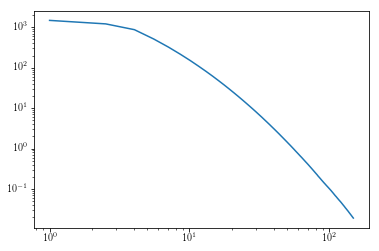

In [22]:
plt.loglog(r_MW, rho_MW)

(array([    26335.,    112005.,    325178.,    799607.,   1803217.,
          3782408.,   7072332.,  11447127.,  16336085.,  20195711.]),
 array([-308561.71875   , -281637.37382813, -254713.02890625,
        -227788.68398438, -200864.3390625 , -173939.99414062,
        -147015.64921875, -120091.30429687,  -93166.959375  ,
         -66242.61445313,  -39318.26953125]),
 <a list of 10 Patch objects>)

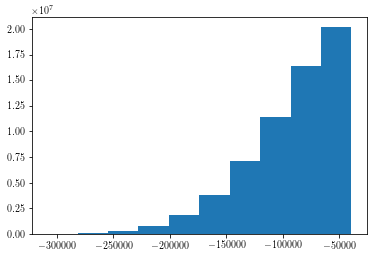

In [23]:
hist(MW_pot)

In [42]:
partmass=massarr[0]*1e10 #generated the halo particles as "bulge"-type in Gadget file
v2=MW_vel[:,0]**2+MW_vel[:,1]**2+MW_vel[:,2]**2
#v2=vv[:,0]**2+vv[:,1]**2+vv[:,2]**2

Ekk=0.5*v2

a=15
r_profiles = np.linspace(1, 150, 500-1)
weights_plum, w_ids_plum = weights.weight_triaxial(rr, Ekk, MW_pot, MW_ids, partmass, 0.5, 100, 1, 'Plummer', [a])
weights_hern, w_ids_hern = weights.weight_triaxial(rr, Ekk, MW_pot, MW_ids, partmass, 0.5, 100, 1, 'Hernquist', [a])

In [43]:
r_profiles = np.linspace(1, 150, 100-1)


In [44]:
density_plum = tracers_properties.den_tracers(weights_plum, w_ids_plum, rr, massarr, 100, 150)
density_hern = tracers_properties.den_tracers(weights_hern, w_ids_hern, rr, massarr, 100, 150)

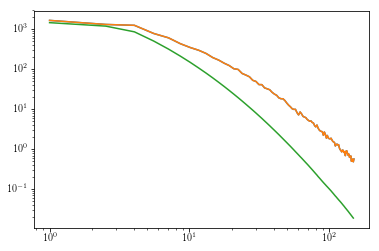

In [45]:
plt.loglog(r_profiles, density_plum*80)
plt.loglog(r_profiles, density_hern*80)

plt.loglog(r_MW, rho_MW)

In [46]:
pp_fut= readsnap('./halos/MWLMC6_100M_new_b0_2_111', 'pos', 'dm')
massarr_fut= readsnap('./halos/MWLMC6_100M_new_b0_2_111', 'mass', 'dm')
ids_fut = readsnap('./halos/MWLMC6_100M_new_b0_2_111', 'pid', 'dm')



In [47]:
MW_pos_fut, MW_ids = jellyfish.host_sat_particles(ids, [100000000, 20830000], 0, pp_fut, ids_fut)

In [48]:
rr_fut=np.sqrt(MW_pos_fut[:,0]**2+MW_pos_fut[:,1]**2+MW_pos_fut[:,2]**2)


In [49]:
r_MW_fut, rho_MW_fut = rho_enclosed(rr_fut, 1, 150, 100)

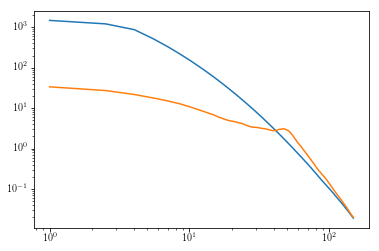

In [50]:
plt.loglog(r_MW, rho_MW)
plt.loglog(r_MW_fut, rho_MW_fut)

In [51]:
density_plum_fut = tracers_properties.den_tracers(weights_plum, w_ids_plum, rr_fut, partmass, 100, 150)

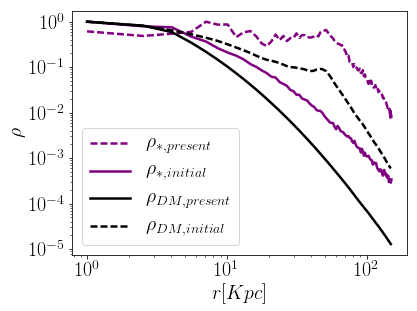

In [80]:
figure(figsize=(6, 4.5))
plt.loglog(r_profiles, density_plum_fut/np.max(density_plum_fut), c='purple', ls='--', lw=2.5, label=r'$\rho_{*, present}$')
plt.loglog(r_profiles, density_plum/np.max(density_plum), c='purple', lw=2.5, label=r'$\rho_{*, initial}$')
plt.loglog(r_MW, rho_MW/np.max(rho_MW), c='k', lw=2.5, label=r'$\rho_{DM, present}$')
plt.loglog(r_MW_fut, rho_MW_fut/np.max(rho_MW_fut), c='k', ls='--', lw=2.5, label=r'$\rho_{DM, initial}$')
legend()
xlabel('$r[Kpc]$', fontsize=20)
ylabel(r'$\rho$', fontsize=20)
plt.savefig('density_profiles_tracers.pdf', bbox_inches='tight', dpi=300)

In [74]:
savefig?

## DM halo density profile

In [ ]:
r_dm, rho_dm = rho_enclosed(rr, 1, 150, 500)

In [ ]:
plt.loglogglog(r_dm, rho_dm)

In [ ]:
loglog(r_profiles[:-1], density_plum[:-1])
loglog(r_profiles, density_plum_lr)
loglog(r_profiles, teo_plummer, label='Teo')

legend()